In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon

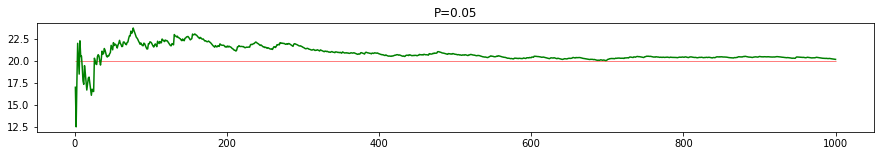

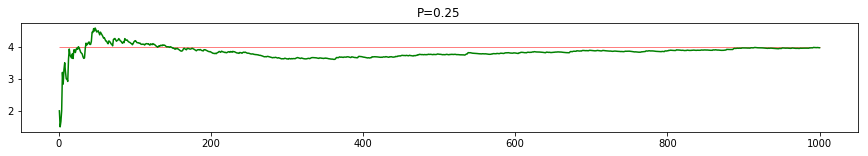

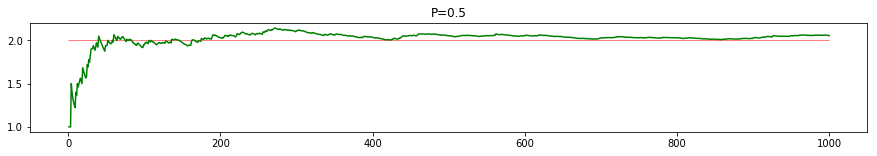

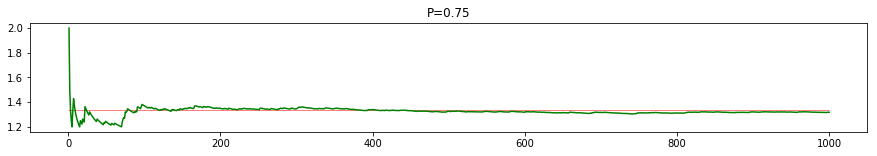

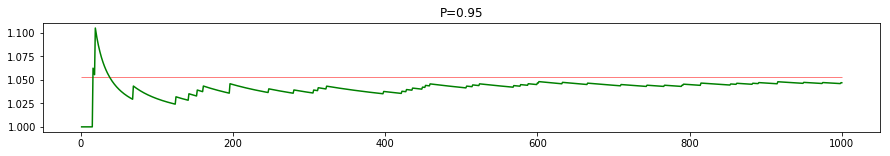

In [35]:
# Task 1.1 Geom

p = [0.05, 0.25, 0.5, 0.75, 0.95]

for i in p:
    tmp, N = plt.gcf(), np.arange(1,1001)
    tmp.set_size_inches(15, 2)
    ksi = geom(i).rvs(1000)
    S = ksi.cumsum()
    
    plt.plot(N, S/N, color = 'g')
    plt.hlines(1/i, 0, len(N), 'r', linewidth=0.5)
    plt.title("P={}".format(i))
    plt.show()

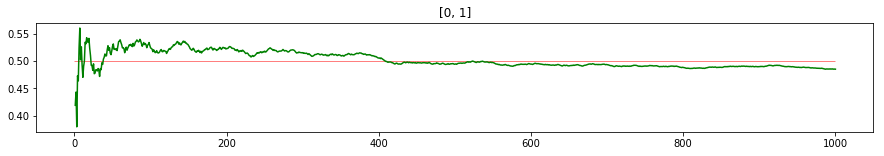

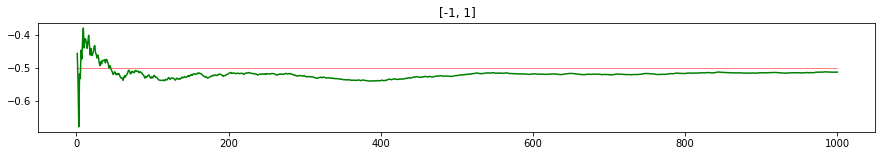

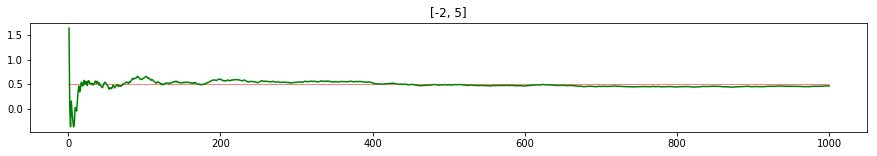

In [49]:
# Task 1.2 Uni

p = [(0, 1), (-1, 1), (-2, 5)]

for i, j in p:
    ksi = uniform(i, j)
    rand = ksi.rvs(size = 1000)    
    S = rand.cumsum()
    N = np.arange(1, 1001)
    a = S/N
    tmp = plt.gcf()
    tmp.set_size_inches(15, 2)
    plt.plot(N,a,color = 'g')
    plt.hlines(ksi.expect(lambda i: i), 0, len(N), 'r', linewidth=0.5)
    plt.title("[{}, {}]".format(i,j))
    plt.show()

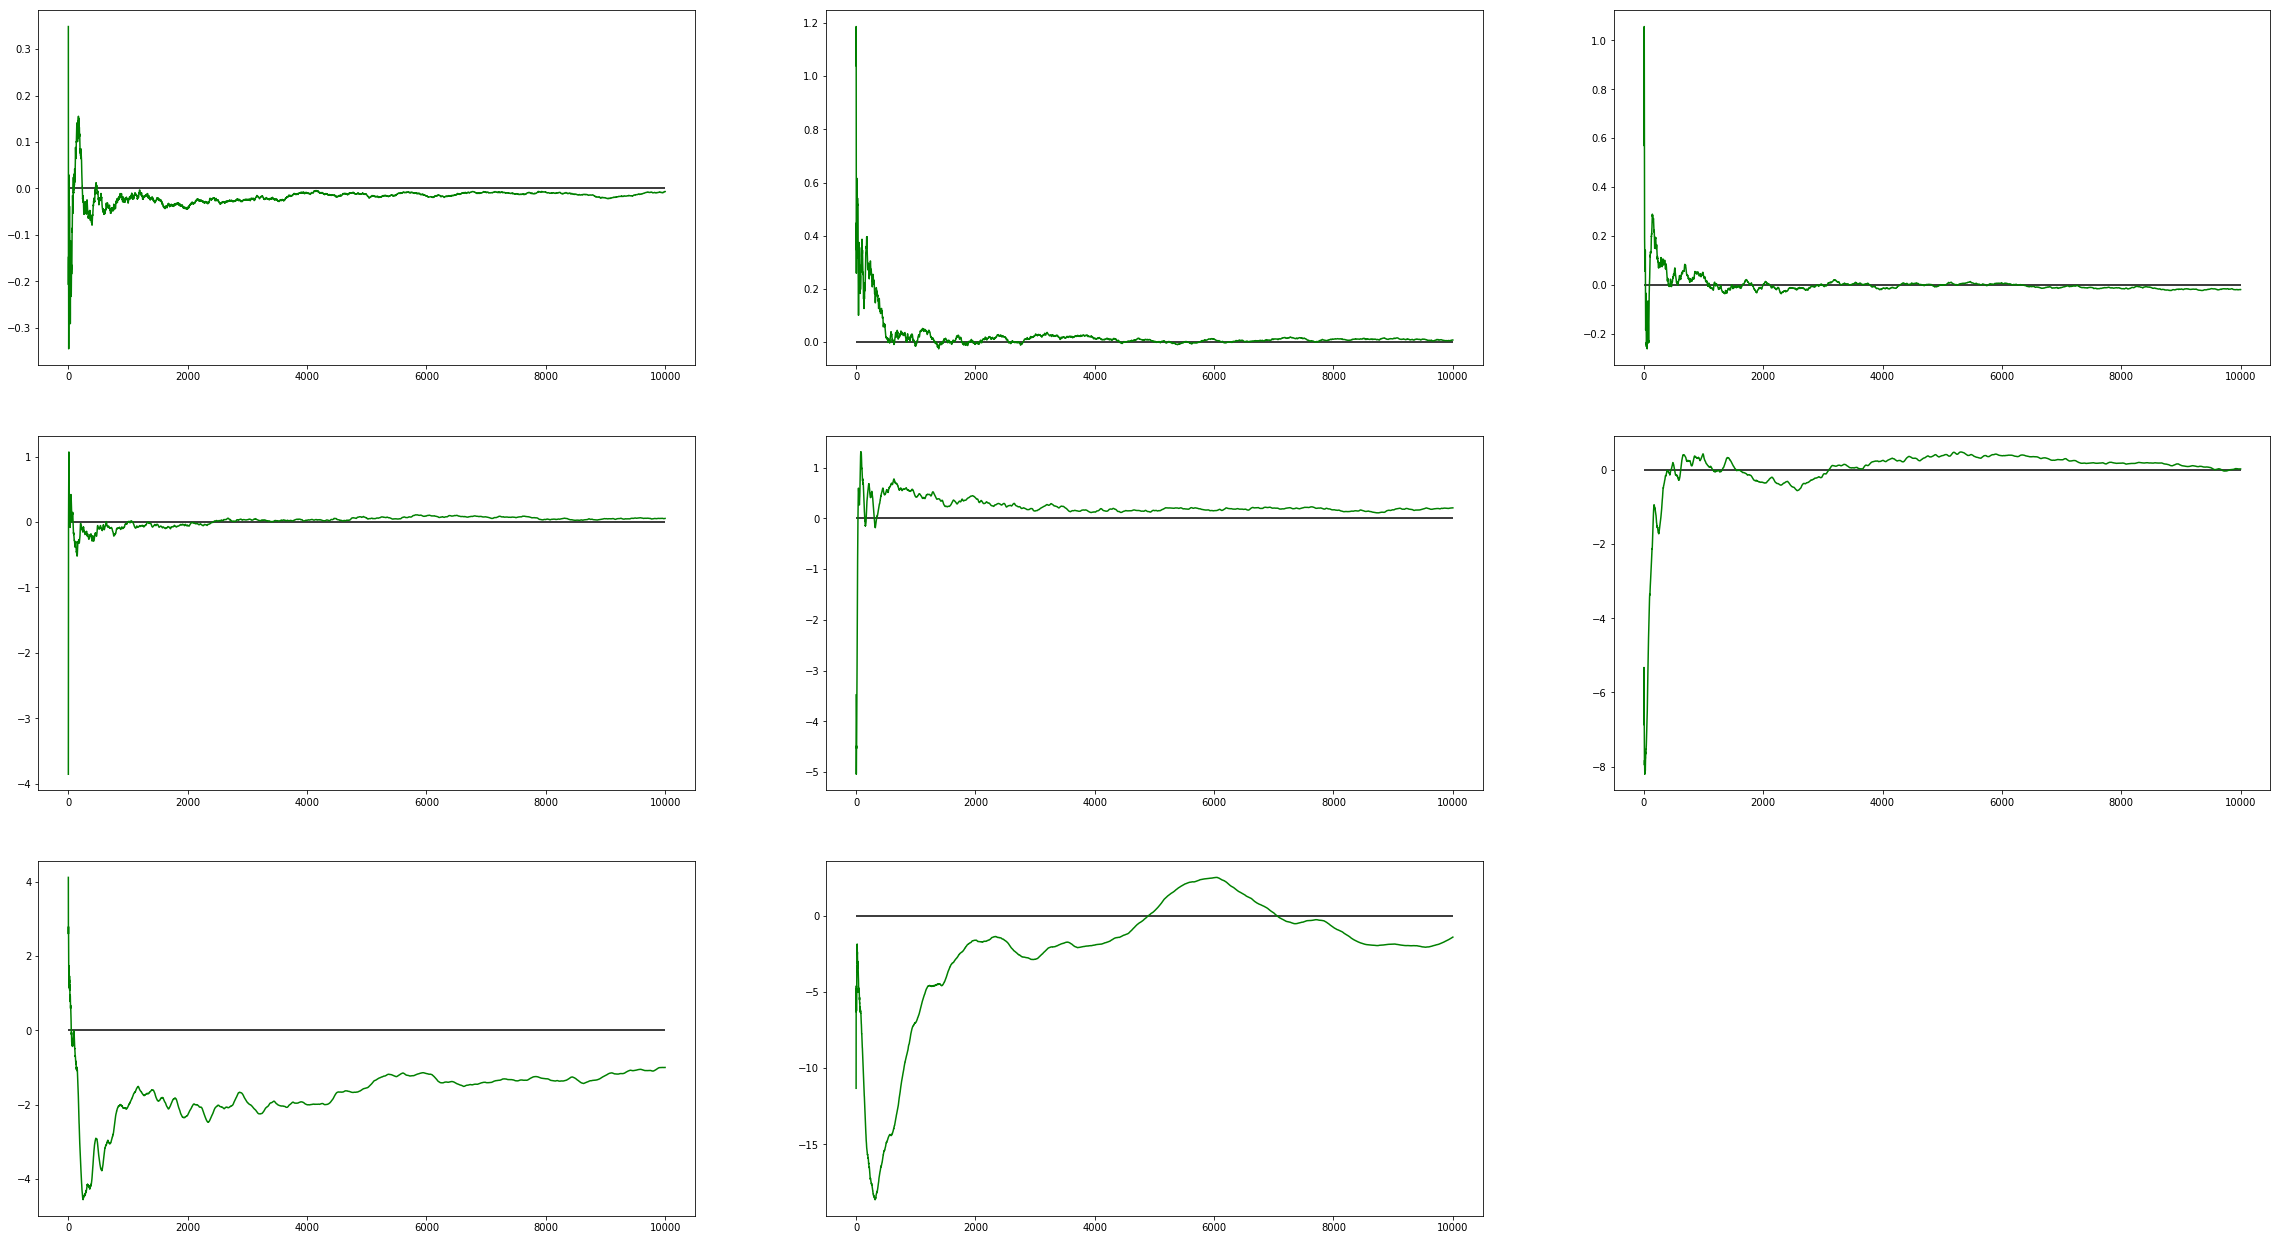

In [80]:
# Task 1.3 Norm
def functionGetKsi(i, j):
    nor,uni,matrix  = norm.rvs(size = i + j + 1), uniform.rvs(0, 1, size = j + 1), np.zeros((i, j+1))
    for k in range(i):
        matrix[k] = nor[i - k: j + i - k + 1]
    return matrix.dot(uni)
N = np.arange(1, 10001)
tmp = plt.figure(figsize=(40, 30))
 
V = [1, 3, 5, 10, 25, 50, 100, 500]
for i, j in enumerate(V, 1):
    ksi = functionGetKsi(10000, j)
    plt.subplot(4, 3, i)
    a = ksi.cumsum()/N
    plt.plot(N, a, color = 'g')
    plt.hlines(0, 0, 10000)

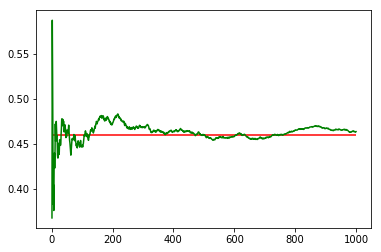

In [88]:
# Task 2.1 UNI

ksi = uniform.rvs(size = 1000)
S,t,N = np.sin(ksi), np.cos(0) - np.cos(1), np.arange(1, 1001)
a = S.cumsum()/N

plt.plot(N, a, color = 'g')
plt.hlines(t, 0, 1000, 'r')
plt.show()

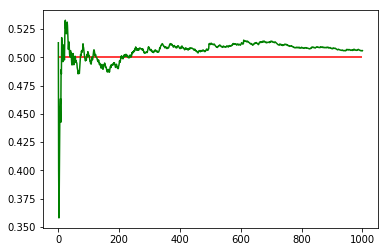

In [114]:
# Task 2.2 EXPON

ksi, N = expon.rvs(loc = 1, size = 1000), np.arange(1, 1001)
ex = 1 / ksi ** 3
r = ex / expon.pdf(ksi, loc=1)
S = r.cumsum() / N

plt.plot(N, S, color = 'g')
plt.hlines(0.5, 0, 1000, 'r')
plt.show()

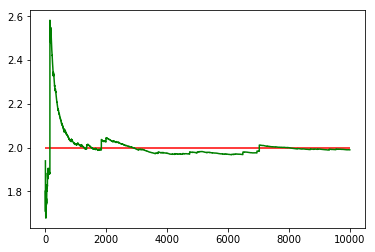

In [116]:
# Task 2.3

nor, N = norm.rvs(size = 10000), np.arange(1, 10001)
ex = np.exp(-np.abs(nor))
r = ex / norm.pdf(nor)
S = r.cumsum()/N

plt.plot(N, S, color = 'g')
plt.hlines(2, 1, 10000, 'r')
plt.show()

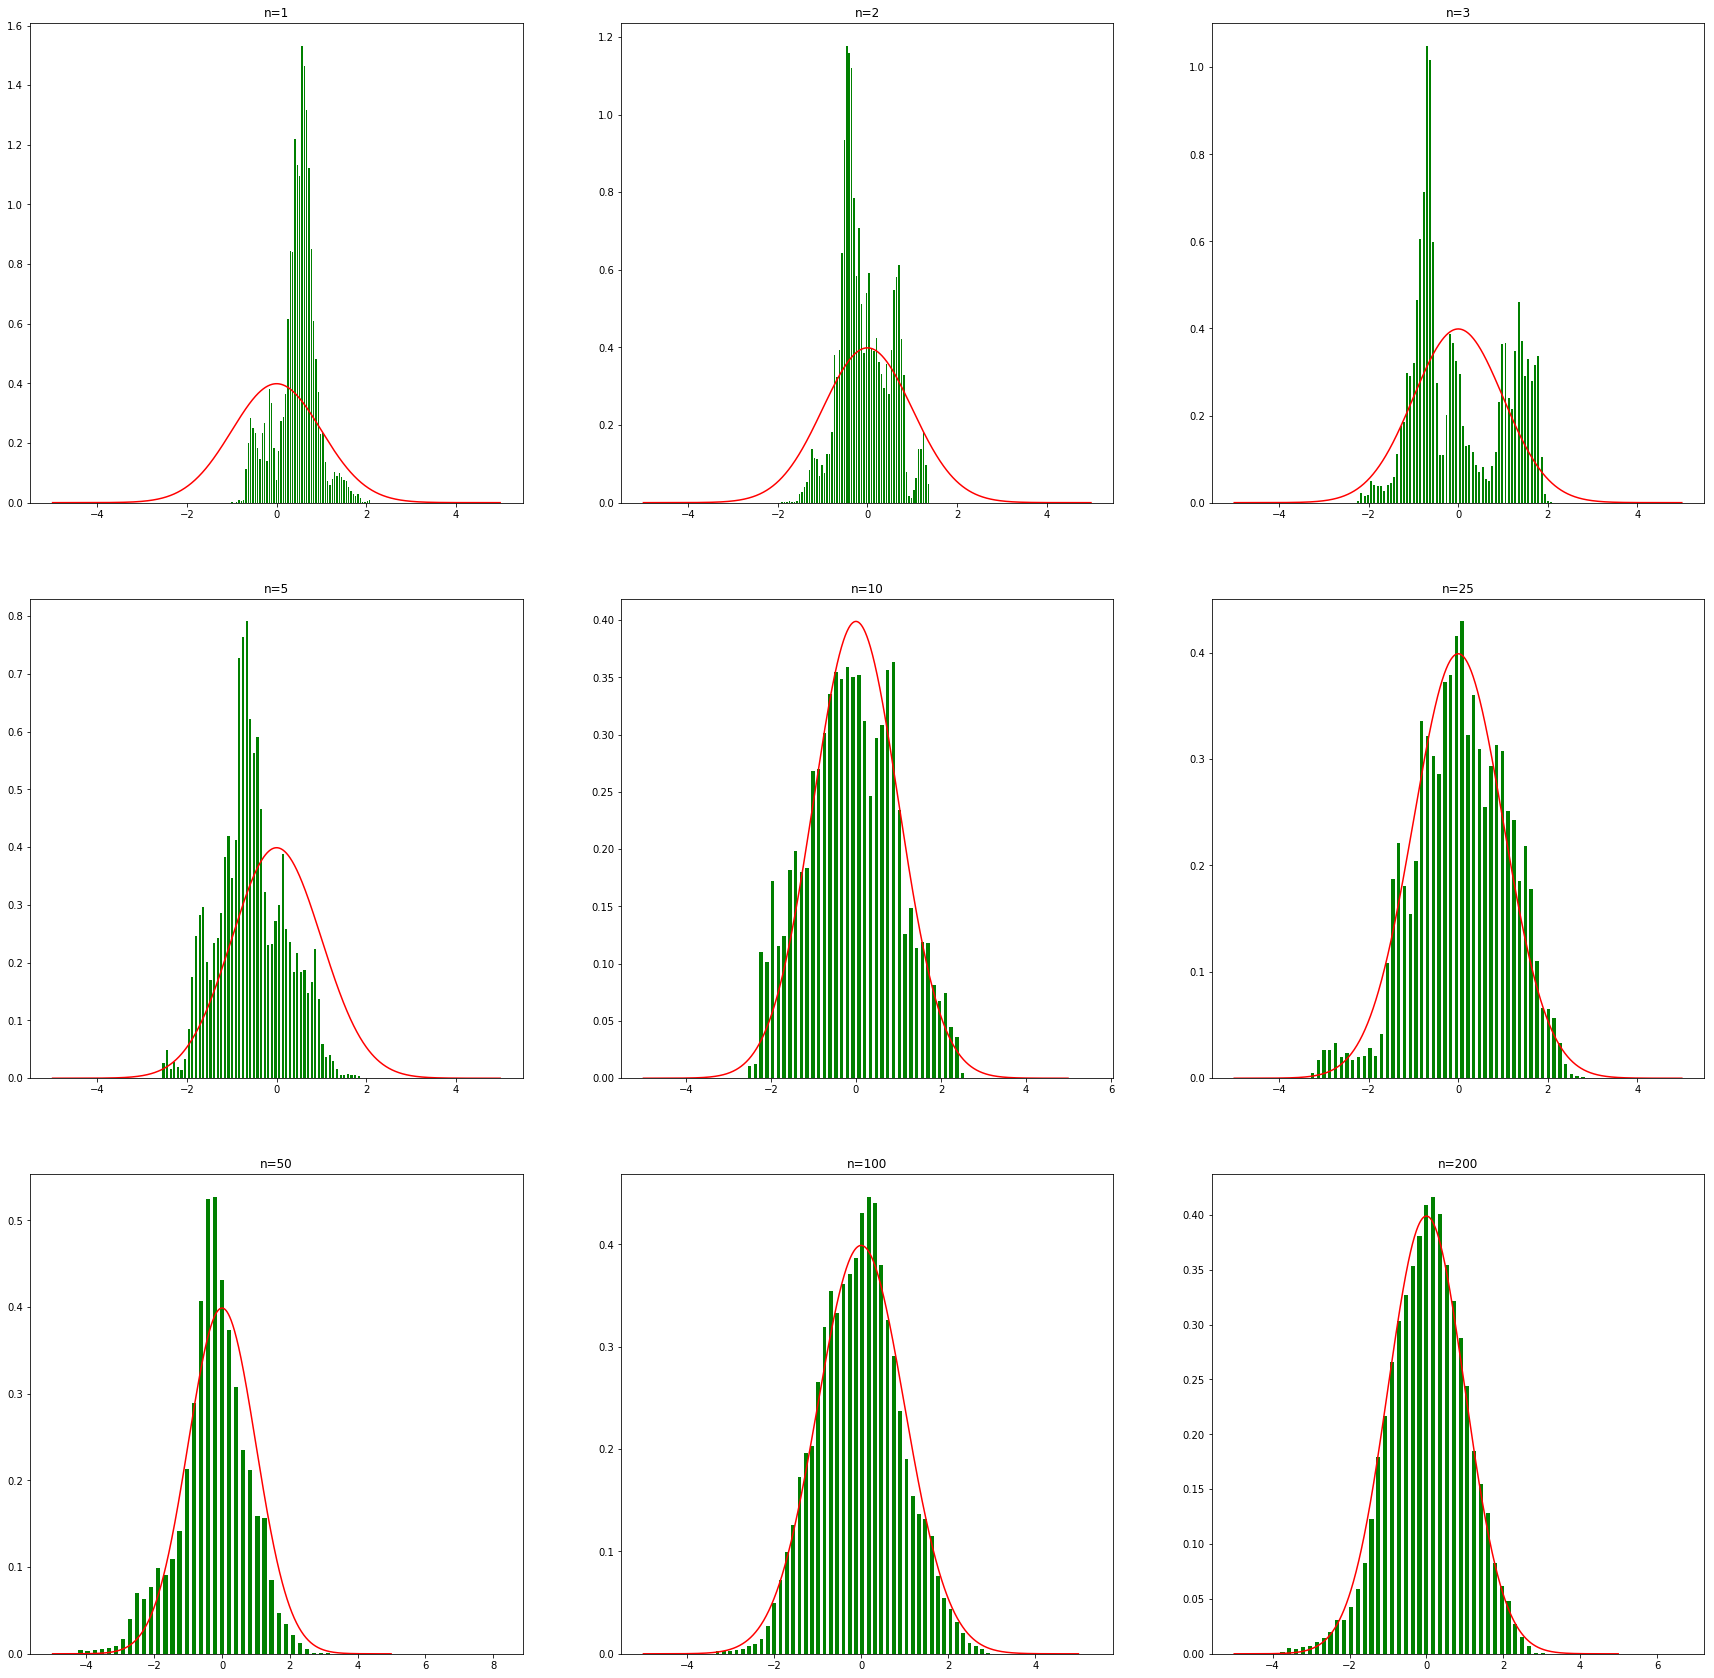

In [133]:
# Task 3.1
n = (1,2,3,5,10,25,50,100,200)


def S(k):
        tmp = 0
        for i, el in enumerate(k):
            tmp += (el-mu)
            res = tmp/(i+1)**(0.5)
            yield res

e = expon(1)
mu, d = e.expect(), e.var()
f, x =plt.figure(figsize=[30,30]), np.arange(-5,5,0.01)

for i, el in enumerate(n):
    ax = f.add_subplot(3,3,i+1)
    ax.set_title("n={}".format(el))
    
    h = list()
    
    for j in range(el):
        h += list(S(e.rvs(size=10000)))
    ax.hist(h, bins=60, density=True, rwidth=0.6, color='g')
    ax.plot(x, norm(0,d**2).pdf(x), color='r')
plt.show()

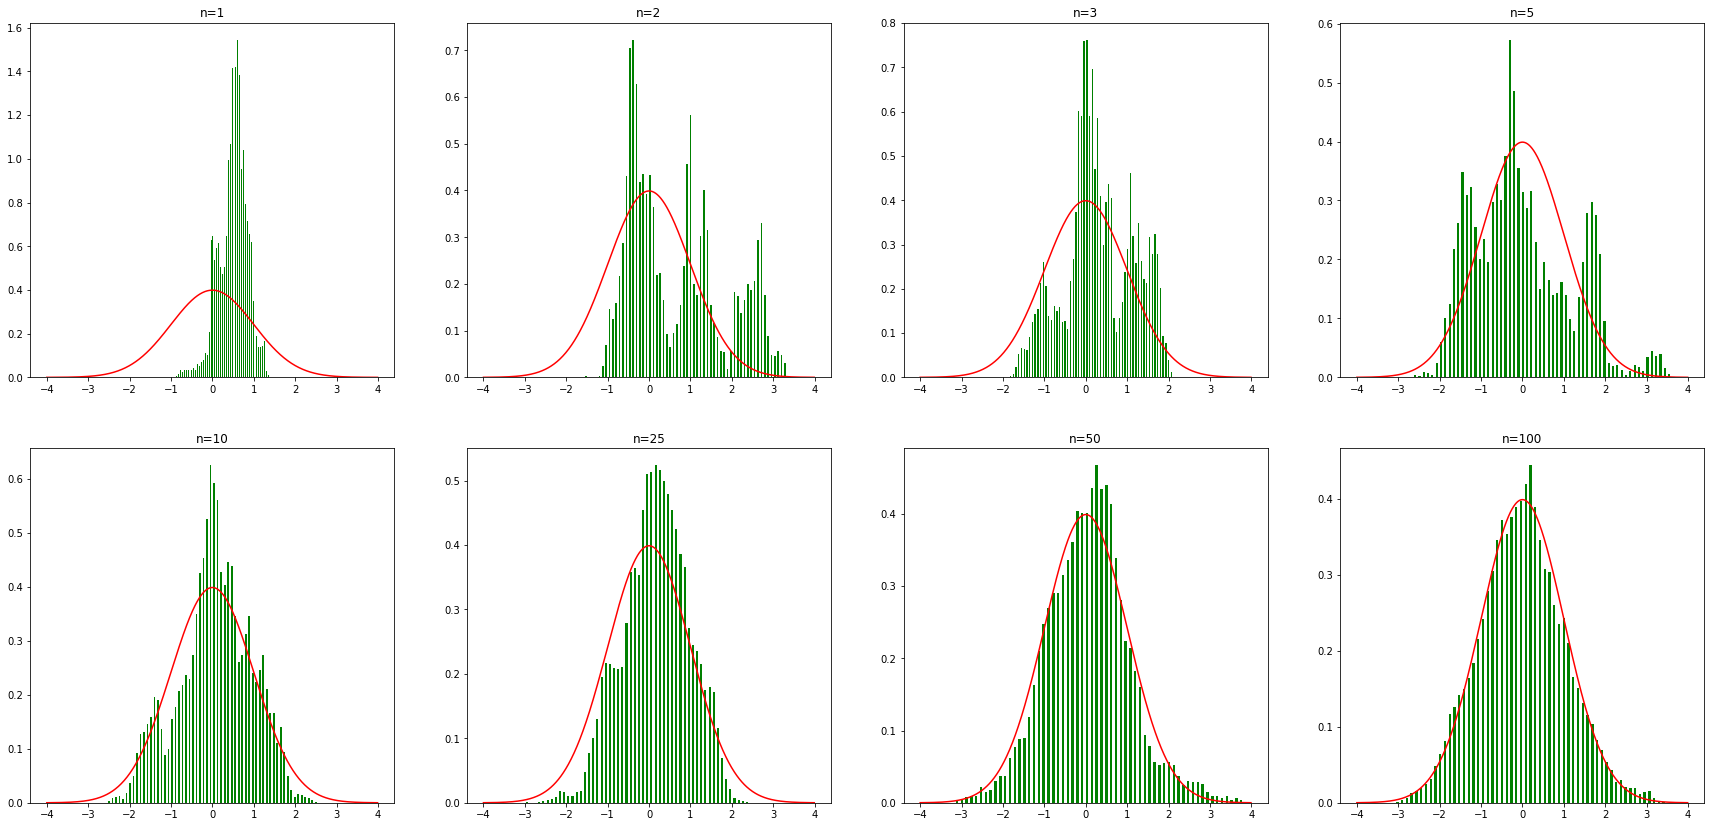

In [141]:
# Task 3.2
n = (1,2,3,5,10,25,50,100)

def SS(k):
        a = 0
        for i, el in enumerate(k):
            a += el
            yield 2*((a)**(0.5)-np.sqrt(i+1))
e, x = expon(), np.arange(-4,4,0.01)
d = e.var()
f =plt.figure(figsize=[30,30])

for i, el in enumerate(n):
    ax = f.add_subplot(4,4,i+1)
    ax.set_title("n={}".format(el))
    
    h = list()
    
    for j in range(el):
        h += list(SS(e.rvs(10000)))
    ax.hist(h, bins=60, density=True, rwidth=0.5, color='g')
    ax.plot(x, norm(0,d**2).pdf(x), color='r')
        
plt.show()